## Import the required Libraries

In [1]:
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


## Initiate the Model

In [2]:
classifier=ResNet50()
print(classifier.summary())

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_____________________________________

## Load the Image

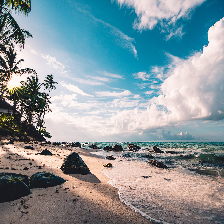

In [3]:
new_image= image.load_img('../Data/Prediction/test_image_3.jpeg', target_size=(224, 224))
new_image

## Change the image to array

In [4]:
transformed_image= image.img_to_array(new_image)
transformed_image.shape


(224, 224, 3)

## Expand the tranfromed image with 4th Dimension

In [5]:
transformed_image=np.expand_dims(transformed_image,axis=0)
transformed_image.shape

(1, 224, 224, 3)

## Preprocess the Image

In [6]:
transformed_image=preprocess_input(transformed_image)
transformed_image

array([[[[ -83.939   ,  -95.779   , -104.68    ],
         [ -79.939   ,  -94.779   , -102.68    ],
         [ -68.939   ,  -92.779   ,  -97.68    ],
         ...,
         [  11.060997,  -39.779   , -123.68    ],
         [  10.060997,  -38.779   , -121.68    ],
         [   9.060997,  -39.779   , -122.68    ]],

        [[ -74.939   ,  -91.779   ,  -99.68    ],
         [ -73.939   ,  -91.779   ,  -99.68    ],
         [ -73.939   ,  -89.779   , -101.68    ],
         ...,
         [  14.060997,  -35.779   , -122.68    ],
         [  10.060997,  -38.779   , -123.68    ],
         [  11.060997,  -37.779   , -122.68    ]],

        [[ -80.939   ,  -90.779   ,  -99.68    ],
         [ -74.939   ,  -89.779   ,  -97.68    ],
         [ -79.939   ,  -87.779   , -103.68    ],
         ...,
         [  14.060997,  -35.779   , -122.68    ],
         [  12.060997,  -35.779   , -122.68    ],
         [  11.060997,  -36.779   , -123.68    ]],

        ...,

        [[ -16.939003,  -29.779   ,  -

## Create a predictor variable

In [7]:
y_pred= classifier.predict(transformed_image)
y_pred

array([[2.52806558e-07, 5.10713505e-07, 7.99274057e-05, 2.32863022e-05,
        4.44944890e-05, 1.00347788e-05, 3.67784050e-05, 1.85772274e-06,
        5.88924081e-07, 3.45138869e-05, 6.36822151e-08, 2.40469760e-08,
        1.12409808e-07, 5.94408618e-07, 6.51918981e-08, 2.19684040e-07,
        2.67402118e-08, 9.66640300e-07, 1.56045996e-06, 2.45844262e-07,
        9.51262393e-08, 2.33751678e-07, 4.92220295e-07, 2.20925199e-06,
        2.38178277e-08, 5.68137125e-07, 6.21466256e-09, 1.93882329e-07,
        5.22632035e-08, 2.62643937e-07, 2.99796511e-06, 2.58928338e-07,
        5.83272026e-07, 2.87351036e-03, 2.21805573e-02, 1.51672448e-05,
        2.06312288e-05, 1.24306771e-05, 3.31688028e-07, 1.58373427e-04,
        2.01707067e-07, 5.85139333e-06, 3.36230414e-06, 4.71934072e-06,
        1.25012048e-06, 3.51070557e-05, 3.09630059e-06, 1.71358317e-06,
        6.29817259e-06, 2.55084287e-05, 2.28884187e-06, 2.39487508e-06,
        3.63111525e-07, 1.74143068e-07, 8.19539127e-06, 3.110978

## Check the shape of the array

In [8]:
y_pred.shape

(1, 1000)

## Make the predictions

In [9]:
from keras.applications.resnet50 import decode_predictions
decode_predictions(y_pred,top=5)

[[('n09428293', 'seashore', 0.5665935),
  ('n09421951', 'sandbar', 0.25813007),
  ('n09332890', 'lakeside', 0.028795514),
  ('n01665541', 'leatherback_turtle', 0.022180557),
  ('n09288635', 'geyser', 0.015906854)]]

# Make the predictions in readable form

In [10]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

seashore (56.66%)
